In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

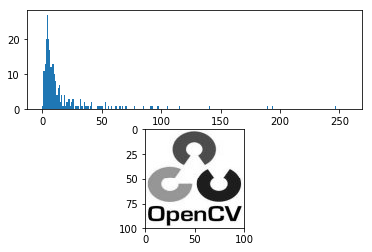

In [3]:
 #OpenCV 统计直方图 用 matplot.hist
img = cv2.imread('rio.jpg',0)
# 别忘了中括号 [img],[0],None,[256],[0,256]，只有 mask 没有中括号
hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.subplot(211)
plt.hist(hist,256,[0,256])
plt.subplot(212)
plt.imshow(img,cmap='gray')
plt.show()

# cv2:calcHist(images; channels; mask; histSize; ranges[; hist[; accumulate]])
1. images: 原图像（图像格式为 uint8 或 float32）。当传入函数时应该
用中括号 [] 括起来，例如： [img]。
2. channels: 同样需要用中括号括起来，它会告诉函数我们要统计那幅图
像的直方图。如果输入图像是灰度图，它的值就是 [0]；如果是彩色图像
的话，传入的参数可以是 [0]， [1]， [2] 它们分别对应着通道 B， G， R。
3. mask: 掩模图像。要统计整幅图像的直方图就把它设为 None。但是如
果你想统计图像某一部分的直方图的话，你就需要制作一个掩模图像，并
使用它。（后边有例子）
4. histSize:BIN 的数目。也应该用中括号括起来，例如： [256]。
5. ranges: 像素值范围，通常为 [0， 256]

In [4]:

hist,bins = np.histogram(img.flatten(),256,[0,256])
print(hist.shape, bins.shape)
print(hist[:10], bins[:10])
hist = cv2.calcHist([img],[0],None,[256],[0,256])
print(hist.shape)
print(hist[:10])

(256,) (257,)
[105  22  26  20  25  22  13  21  23  12] [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
(256, 1)
[[105.]
 [ 22.]
 [ 26.]
 [ 20.]
 [ 25.]
 [ 22.]
 [ 13.]
 [ 21.]
 [ 23.]
 [ 12.]]


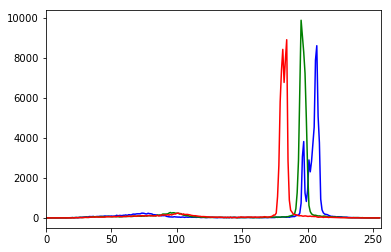

In [5]:
#OpenCV 统计直方图 用 matplot.plot
img = cv2.imread('1.jpg')
color = ('b','g','r')
# 对一个列表或数组既要遍历索引又要遍历元素时
# 使用内置 enumerrate 函数会有更加直接，优美的做法
#enumerate 会将数组或列表组成一个索引序列。
# 使我们再获取索引和索引内容的时候更加方便
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

(100, 100)


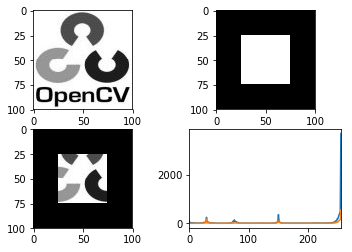

In [6]:
# 要统计图像某个局部区域的直方图只需要构建一副掩模图像。将要统计的
# 部分设置成白色，其余部分为黑色，就构成了一副掩模图像。

img = cv2.imread('rio.jpg',0)
print(img.shape)
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[25:75, 25:75] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

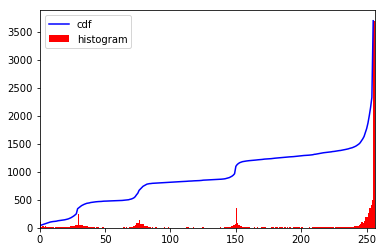

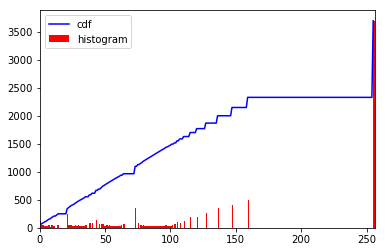

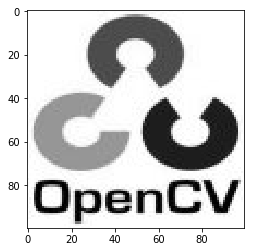

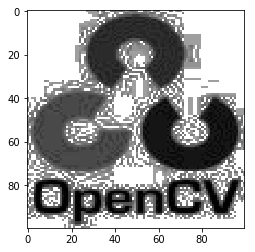

In [12]:
#直方图均衡

img = cv2.imread('rio.jpg',0)
#flatten() 将数组变成一维
hist,bins = np.histogram(img.flatten(),256,[0,256])
# 计算累积分布图
cdf = hist.cumsum()
# 把cdf的最大值与hist最大值相同
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
# 对被掩盖的元素赋值，这里赋值为 0
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[img]

hist,bins = np.histogram(img2.flatten(),256,[0,256])
# 计算累积分布图
cdf = hist.cumsum()
# 把cdf的最大值与hist最大值相同
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

plt.imshow(img,cmap='gray')
plt.show()

plt.imshow(img2, cmap='gray')
plt.show()

# OpenCV 中的直方图均衡化

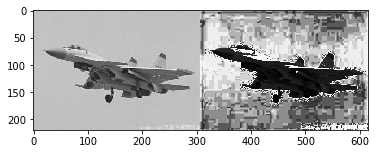

In [15]:
img = cv2.imread('1.jpg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ))
#stacking images side-by-side
#cv2.imwrite('res.png',res)
plt.imshow(res,cmap='gray')
plt.show()

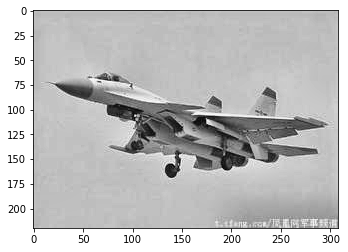

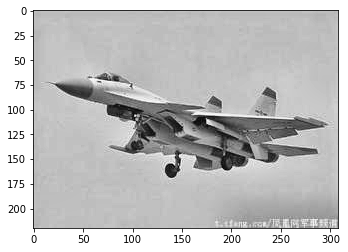

In [18]:
#自适应的直方图均衡化
img = cv2.imread('1.jpg',0)
# create a CLAHE object (Arguments are optional).
# 不知道为什么我没好到 createCLAHE 这个模块
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
plt.imshow(cl1,cmap='gray')
plt.show()
plt.imshow(cl1,cmap='gray')
plt.show()

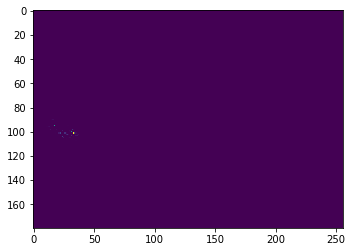

In [19]:
#OpenCV 中的 2D 直方图
img = cv2.imread('1.jpg')
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
#第一个参数是 H 通道，第二个参数是 S 通道，第三个参数是 bins 的数目，第四个参数是数值范围
hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
plt.imshow(hist,interpolation = 'nearest')
plt.show()

In [20]:
hist.shape

(180, 256)

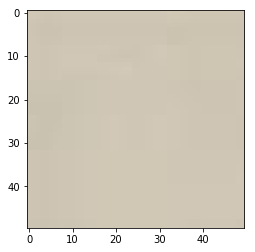

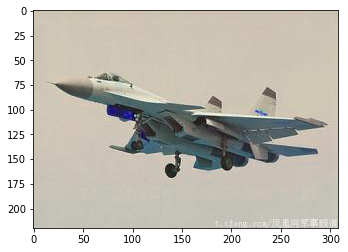

In [22]:
img = cv2.imread('1.jpg')
img.shape
sky = img[:50,:50,:]
plt.imshow(sky)
plt.show()

plt.imshow(img)
plt.show()

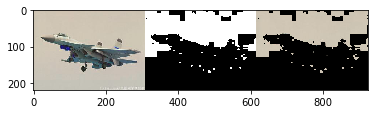

In [28]:
img = cv2.imread('1.jpg')
sky = img[:20,:20,:]

roi = sky
hsv = cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)
target = img
hsvt = cv2.cvtColor(target,cv2.COLOR_BGR2HSV)
# calculating object histogram
roihist = cv2.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )
# normalize histogram and apply backprojection
# 归一化：原始图像，结果图像，映射到结果图像中的最小值，最大值，归一化类型
#cv2.NORM_MINMAX 对数组的所有值进行转化，使它们线性映射到最小值和最大值之间
# 归一化之后的直方图便于显示，归一化之后就成了 0 到 255 之间的数了。
cv2.normalize(roihist,roihist,0,255,cv2.NORM_MINMAX)
dst = cv2.calcBackProject([hsvt],[0,1],roihist,[0,180,0,256],1)
# Now convolute with circular disc
# 此处卷积可以把分散的点连在一起
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
dst=cv2.filter2D(dst,-1,disc)
# threshold and binary AND
ret,thresh = cv2.threshold(dst,50,255,0)
# 别忘了是三通道图像，因此这里使用 merge 变成 3 通道
thresh = cv2.merge((thresh,thresh,thresh))
# 按位操作
res = cv2.bitwise_and(target,thresh)
res = np.hstack((target,thresh,res))
#cv2.imwrite('res.jpg',res)
# 显示图像
# cv2.imshow('1',res)
# cv2.waitKey(0)

plt.imshow(res)
plt.show()

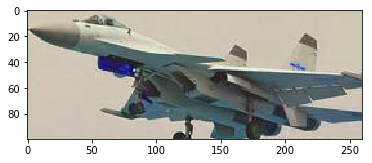

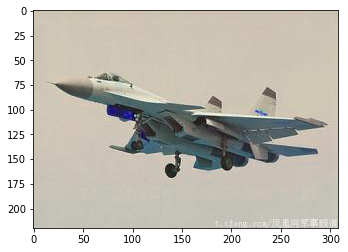

In [31]:
#OpenCV 中的模板匹配
img = cv2.imread('1.jpg')
img.shape
air = img[60:160,20:280]
plt.imshow(sky)
plt.show()

plt.imshow(img)
plt.show()

# 模板匹配

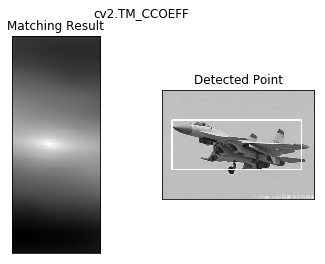

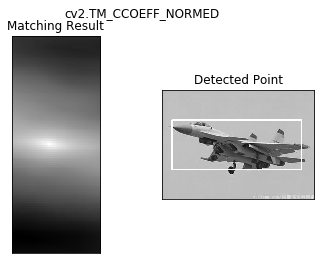

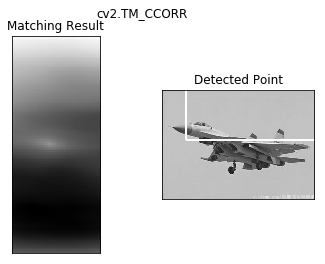

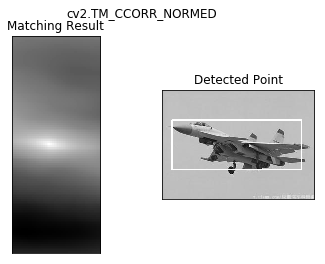

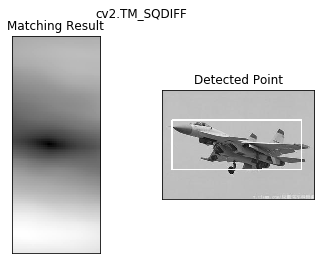

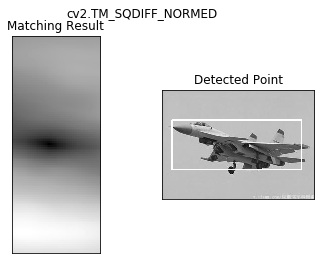

In [44]:
#模板匹配
img = cv2.imread('1.jpg',0)
img2 = img.copy()
template = img[60:160,20:280] # air
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    #exec 语句用来执行储存在字符串或文件中的 Python 语句。
    # 例如，我们可以在运行时生成一个包含 Python 代码的字符串，然后使用 exec 语句执行这些语句。
    #eval 语句用来计算存储在字符串中的有效 Python 表达式
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # 使用不同的比较方法，对结果的解释不同
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

In [46]:
res = cv2.matchTemplate(img,template,method)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

In [35]:
res.shape

(121, 49)

In [38]:
min_val, max_val, min_loc, max_loc

(0.00836875755339861, 0.2904772460460663, (20, 60), (5, 109))

# 多对象的模板匹配

0.4192142 -0.57196844 -0.061008923
(array([  4,   4,   4, ..., 353, 353, 353], dtype=int64), array([361, 362, 363, ..., 362, 363, 364], dtype=int64))


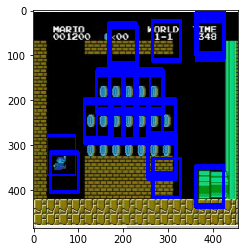

In [59]:
img_rgb = cv2.imread('game.JPG')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('coin.JPG',0)
w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.35
print(res.max(), res.min(), res.mean())
#umpy.where(condition[, x, y])
#Return elements, either from x or y, depending on condition.
#If only condition is given, return condition.nonzero().
loc = np.where( res >= threshold)
print(loc)
for pt in zip(*loc[::-1]):
    img_rgb = cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
    
plt.imshow(img_rgb)
plt.show()

# Hough 直线变换
如何在一张图片中检测直线

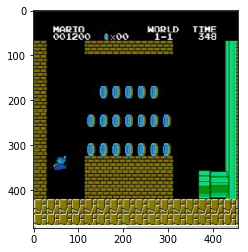

In [61]:
img = cv2.imread('game.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
lines = cv2.HoughLines(edges,1,np.pi/180,200)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    img = cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
plt.imshow(img)
plt.show()

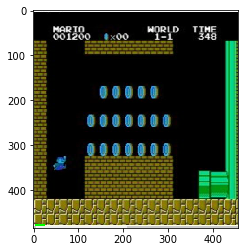

In [63]:
img = cv2.imread('game.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
for x1,y1,x2,y2 in lines[0]:
    img = cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
plt.imshow(img)
plt.show()

# Hough 圆环变换# 

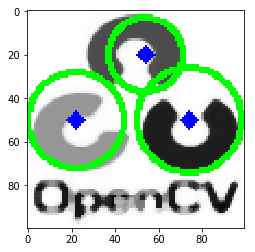

In [66]:
img = cv2.imread('rio.jpg',0)
img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
param1=50,param2=30,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cimg = cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cimg = cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
plt.imshow(cimg)
plt.show()

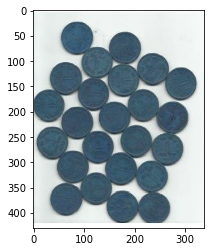

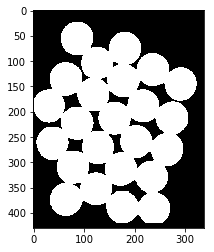

In [6]:
#分水岭算法图像分割
img = cv2.imread('coins.JPG')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(img,cmap='gray')
plt.show()

plt.imshow(thresh, cmap='gray')
plt.show()




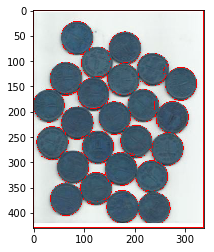

In [7]:

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
# 距离变换的基本含义是计算一个图像中非零像素点到最近的零像素点的距离，也就是到零像素点的最短距离
# 个最常见的距离变换算法就是通过连续的腐蚀操作来实现，腐蚀操作的停止条件是所有前景像素都被完全
# 腐蚀。这样根据腐蚀的先后顺序，我们就得到各个前景像素点到前景中心呗Ⅵ像素点的
# 距离。根据各个像素点的距离值，设置为不同的灰度值。这样就完成了二值图像的距离变换
#cv2.distanceTransform(src, distanceType, maskSize)
# 第二个参数 0,1,2 分别表示 CV_DIST_L1, CV_DIST_L2 , CV_DIST_C
dist_transform = cv2.distanceTransform(opening,1,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers1 = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers1+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0


markers3 = cv2.watershed(img,markers)
img[markers3 == -1] = [255,0,0]

plt.imshow(img)
plt.show()

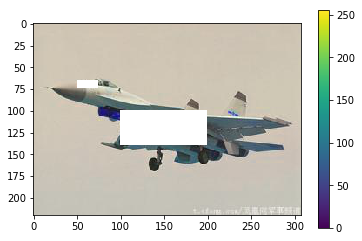

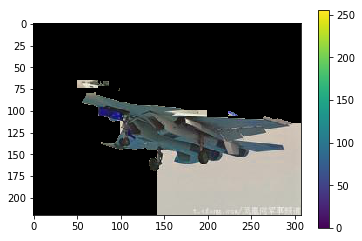

(<matplotlib.image.AxesImage at 0x12b8c355f28>,
 None)

In [18]:
img = cv2.imread('1.jpg')
ma1 = img[65:75,50:75].copy()
ma2 = img[100:140,100:200].copy()
img[65:75,50:75] = img[100:140,100:200] = 255
plt.imshow(img),plt.colorbar(),plt.show()
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,50,450,290)
# 函数的返回值是更新的 mask, bgdModel, fgdModel
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
img[65:75,50:75] = ma1
img[100:140,100:200] = ma2
plt.imshow(img),plt.colorbar(),plt.show()

In [ ]:
img = cv2.imread('1.jpg')
img[200:210,100:110] = 255
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,50,450,290)
# 函数的返回值是更新的 mask, bgdModel, fgdModel
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

#  #Harris 角点检测

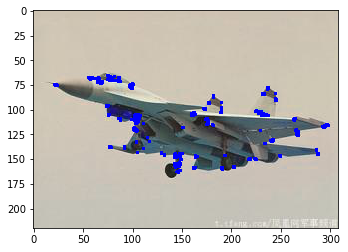

In [20]:
#Harris 角点检测
filename = '1.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
# 输入图像必须是 float32，最后一个参数在 0.04 到 0.05 之间
dst = cv2.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
plt.imshow(img)
plt.show()

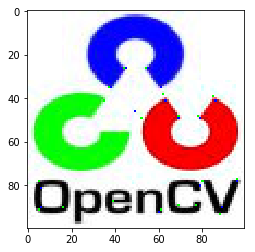

In [22]:
filename = 'rio.jpg'
img = cv2.imread(filename)
height,width=img.shape[:2]
res=cv2.resize(img,(2*width,2*height),interpolation=cv2.INTER_CUBIC)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# find Harris corners
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)
# find centroids
#connectedComponentsWithStats(InputArray image, OutputArray labels, OutputArray stats,
#OutputArray centroids, int connectivity=8, int ltype=CV_32S)
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
#Python: cv2.cornerSubPix(image, corners, winSize, zeroZone, criteria)
#zeroZone – Half of the size of the dead region in the middle of the search zone
#over which the summation in the formula below is not done. It is used sometimes
# to avoid possible singularities of the autocorrelation matrix. The value of (-1,-1)
# indicates that there is no such a size.
# 返回值由角点坐标组成的一个数组（而非图像）
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
# Now draw them
res = np.hstack((centroids,corners))
#np.int0 可以用来省略小数点后面的数字（非四㮼五入）。
res = np.int0(res)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]
plt.imshow(img)
plt.show()

# Shi-Tomasi 角点检测 & 适合于跟踪的图像特
征 

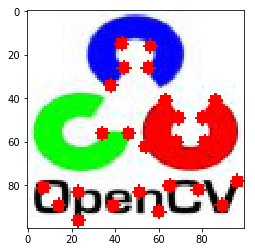

(<matplotlib.image.AxesImage at 0x12b89ace390>, None)

In [23]:
img = cv2.imread('rio.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
# 返回的结果是 [[ 311., 250.]] 两层括号的数组。
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,-1)
plt.imshow(img),plt.show()

In [ ]:
img1 = cv2.imread('box.png',0) # queryImage
img2 = cv2.imread('box_in_scene.png',0) # trainImage